In [29]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [30]:
# Specify the folder to export the figures
FIGURES_FOLDER = 'figures'

# Specify data and output folders
INPUT_FOLDER = 'input_files'
OUTPUT_FOLDER = 'output_files'

In [31]:
RESULTS_FILE = os.path.join(INPUT_FOLDER, "simulation_results.csv")
df = pd.read_csv(RESULTS_FILE)
df.head(5)

feedNH3  feedH2S  feedH20       QN1       QN2   QC        SF   H2S_ppm  \
0    0.001    0.001    0.998  450000.0  700000.0  3.0  0.090909  0.000313   
1    0.001    0.001    0.998  450000.0  700000.0  3.0  0.181818  0.010239   
2    0.001    0.001    0.998  450000.0  700000.0  3.0  0.272727  0.645766   
3    0.001    0.001    0.998  450000.0  700000.0  3.0  0.363636  0.294084   
4    0.001    0.001    0.998  450000.0  700000.0  3.0  0.454545  0.831464   

     NH3_ppm  
0   0.714132  
1   2.507203  
2  18.451377  
3  11.326070  
4  19.566638

In [32]:
print('Data rows:', df.shape[0])

Data rows: 897255


In [33]:
# Observing data tail
df.tail(5)

feedNH3  feedH2S  feedH20       QN1        QN2   QC        SF  \
897250   0.0091   0.0037   0.9872  480000.0   980000.0  3.0  0.000000   
897251   0.0082   0.0037   0.9881  500000.0   870000.0  3.0  0.454545   
897252   0.0082   0.0046   0.9872  510000.0  1030000.0  3.0  0.636364   
897253   0.0082   0.0037   0.9881  580000.0  1170000.0  3.0  0.454545   
897254   0.0091   0.0064   0.9845  460000.0   900000.0  3.0  0.818182   

         H2S_ppm    NH3_ppm  
897250  0.157615   8.449645  
897251  0.067897   5.320042  
897252  0.061325   5.334185  
897253  0.049253   4.881684  
897254  3.981980  59.276283

In [34]:
# Observing a sample
SAMPLE_SIZE = 5
start = np.random.randint(0, len(df) - SAMPLE_SIZE + 1)
sample_df = df.iloc[start : start + SAMPLE_SIZE]

sample_df.head(SAMPLE_SIZE)

feedNH3  feedH2S  feedH20       QN1        QN2   QC        SF  \
188660   0.0010   0.0082   0.9908  500000.0  1120000.0  3.0  0.181818   
188661   0.0028   0.0028   0.9944  590000.0  1200000.0  3.0  0.090909   
188662   0.0028   0.0019   0.9953  510000.0   880000.0  3.0  0.818182   
188663   0.0010   0.0091   0.9899  600000.0  1200000.0  3.0  0.454545   
188664   0.0019   0.0073   0.9908  490000.0  1070000.0  3.0  0.454545   

         H2S_ppm    NH3_ppm  
188660  0.003325   2.717316  
188661  0.003577   2.807828  
188662  0.701373  19.756876  
188663  0.000969   0.998161  
188664  0.132574   7.591975

In [35]:
df.describe()

feedNH3        feedH2S        feedH20            QN1  \
count  897254.000000  897255.000000  897255.000000  897255.000000   
mean        0.005049       0.005050       0.989901  524999.860686   
std         0.002585       0.002585       0.003656   46098.094915   
min         0.001000       0.001000       0.981800  450000.000000   
25%         0.002800       0.002800       0.987200  480000.000000   
50%         0.004600       0.005500       0.989900  530000.000000   
75%         0.007300       0.007300       0.992600  570000.000000   
max         0.009100       0.009100       0.998000  600000.000000   

                QN2        QC             SF       H2S_ppm       NH3_ppm  
count  8.972550e+05  897255.0  897255.000000  8.972550e+05  8.972550e+05  
mean   9.499940e+05       3.0       0.454533  4.364661e+03  8.060725e+01  
std    1.471950e+05       0.0       0.287474  1.372127e+04  5.628852e+03  
min    7.000000e+05       3.0       0.000000  1.634596e-30  3.719056e-32  
25%    8.200000e+05       3.0       0.181818  4.148268e-01  2.394929e-03  
50%    9.500000e+05       3.0       0.454545  1.660825e+03  6.077546e+00  
75%    1.080000e+06       3.0       0.727273  7.546250e+03  2.247266e+01  
max    1.200000e+06       3.0       0.909091  1.000000e+06  1.000000e+06

In [36]:
# Check for NaN values
nan_check = df.isna().sum()
print("NaN values per column:\n", nan_check)

# Check for zero values
zero_check = (df == 0).sum()
print("\nZero values per column:\n", zero_check)


NaN values per column:
 feedNH3    1
feedH2S    0
feedH20    0
QN1        0
QN2        0
QC         0
SF         0
H2S_ppm    0
NH3_ppm    0
dtype: int64

Zero values per column:
 feedNH3        0
feedH2S        0
feedH20        0
QN1            0
QN2            0
QC             0
SF         81564
H2S_ppm        0
NH3_ppm        0
dtype: int64


In [37]:
# Filter rows with NaN values
nan_rows = df[df.isna().any(axis=1)]
print("Rows with NaN values:\n", nan_rows)


Rows with NaN values:
         feedNH3  feedH2S  feedH20       QN1       QN2   QC        SF  \
152531      NaN   0.0019   0.9962  510000.0  730000.0  3.0  0.181818   

         H2S_ppm    NH3_ppm  
152531  1.482682  29.982455  


In [38]:
# Drop rows with any NaN values
df = df.dropna()

# Optionally, reset the index if needed
df = df.reset_index(drop=True)

# Check for NaN values
nan_check = df.isna().sum()
print("NaN values per column:\n", nan_check)

NaN values per column:
 feedNH3    0
feedH2S    0
feedH20    0
QN1        0
QN2        0
QC         0
SF         0
H2S_ppm    0
NH3_ppm    0
dtype: int64


In [39]:
# Drop columns
df = df.drop(columns=['QC', 'feedH20'])
df.head()

feedNH3  feedH2S       QN1       QN2        SF   H2S_ppm    NH3_ppm
0    0.001    0.001  450000.0  700000.0  0.090909  0.000313   0.714132
1    0.001    0.001  450000.0  700000.0  0.181818  0.010239   2.507203
2    0.001    0.001  450000.0  700000.0  0.272727  0.645766  18.451377
3    0.001    0.001  450000.0  700000.0  0.363636  0.294084  11.326070
4    0.001    0.001  450000.0  700000.0  0.454545  0.831464  19.566638

In [40]:
# Applying the rule to transform the last two columns into binary values
df['H2S_binary'] = df['H2S_ppm'] >= 0.2
df['NH3_binary'] = df['NH3_ppm'] >= 15
df['H2S_binary'] = df['H2S_binary'].astype(int)
df['NH3_binary'] = df['NH3_binary'].astype(int)
df.head()

feedNH3  feedH2S       QN1       QN2        SF   H2S_ppm    NH3_ppm  \
0    0.001    0.001  450000.0  700000.0  0.090909  0.000313   0.714132   
1    0.001    0.001  450000.0  700000.0  0.181818  0.010239   2.507203   
2    0.001    0.001  450000.0  700000.0  0.272727  0.645766  18.451377   
3    0.001    0.001  450000.0  700000.0  0.363636  0.294084  11.326070   
4    0.001    0.001  450000.0  700000.0  0.454545  0.831464  19.566638   

   H2S_binary  NH3_binary  
0           0           0  
1           0           0  
2           1           1  
3           1           0  
4           1           1

In [41]:
# Drop columns
df = df.drop(columns=['H2S_ppm', 'NH3_ppm'])
df.head()

feedNH3  feedH2S       QN1       QN2        SF  H2S_binary  NH3_binary
0    0.001    0.001  450000.0  700000.0  0.090909           0           0
1    0.001    0.001  450000.0  700000.0  0.181818           0           0
2    0.001    0.001  450000.0  700000.0  0.272727           1           1
3    0.001    0.001  450000.0  700000.0  0.363636           1           0
4    0.001    0.001  450000.0  700000.0  0.454545           1           1

In [42]:
# Separate features and labels from original df first
df2_x = df.iloc[:, :-2]  # All columns except last two
df2_bin_y = df.iloc[:, -2:]  # Only last two columns

scaler2_x = PowerTransformer()

df2_scaled_x = pd.DataFrame(scaler2_x.fit_transform(df2_x), 
                            columns=df2_x.columns, 
                            index=df2_x.index)

df2_scaled = df2_scaled_x.join(df2_bin_y)
print("Scaled DataFrames created successfully!")

Scaled DataFrames created successfully!


In [43]:
# Export the scaled dataframe using joblib
joblib.dump(df2_scaled_x, os.path.join(INPUT_FOLDER, 'df2_scaled_x.joblib'))
joblib.dump(df2_bin_y, os.path.join(INPUT_FOLDER, 'df2_bin_y.joblib'))

# Export the scalers using joblib
joblib.dump(scaler2_x, os.path.join(INPUT_FOLDER, 'scaler2_x.joblib'))

# Export column names
joblib.dump(df2_scaled_x.columns, os.path.join(INPUT_FOLDER, 'df2_scaled_x_columns.joblib'))
joblib.dump(df2_bin_y.columns, os.path.join(INPUT_FOLDER, 'df2_bin_y_columns.joblib'))
print("Data and scalers exported successfully to the input files folder!")

Data and scalers exported successfully to the input files folder!


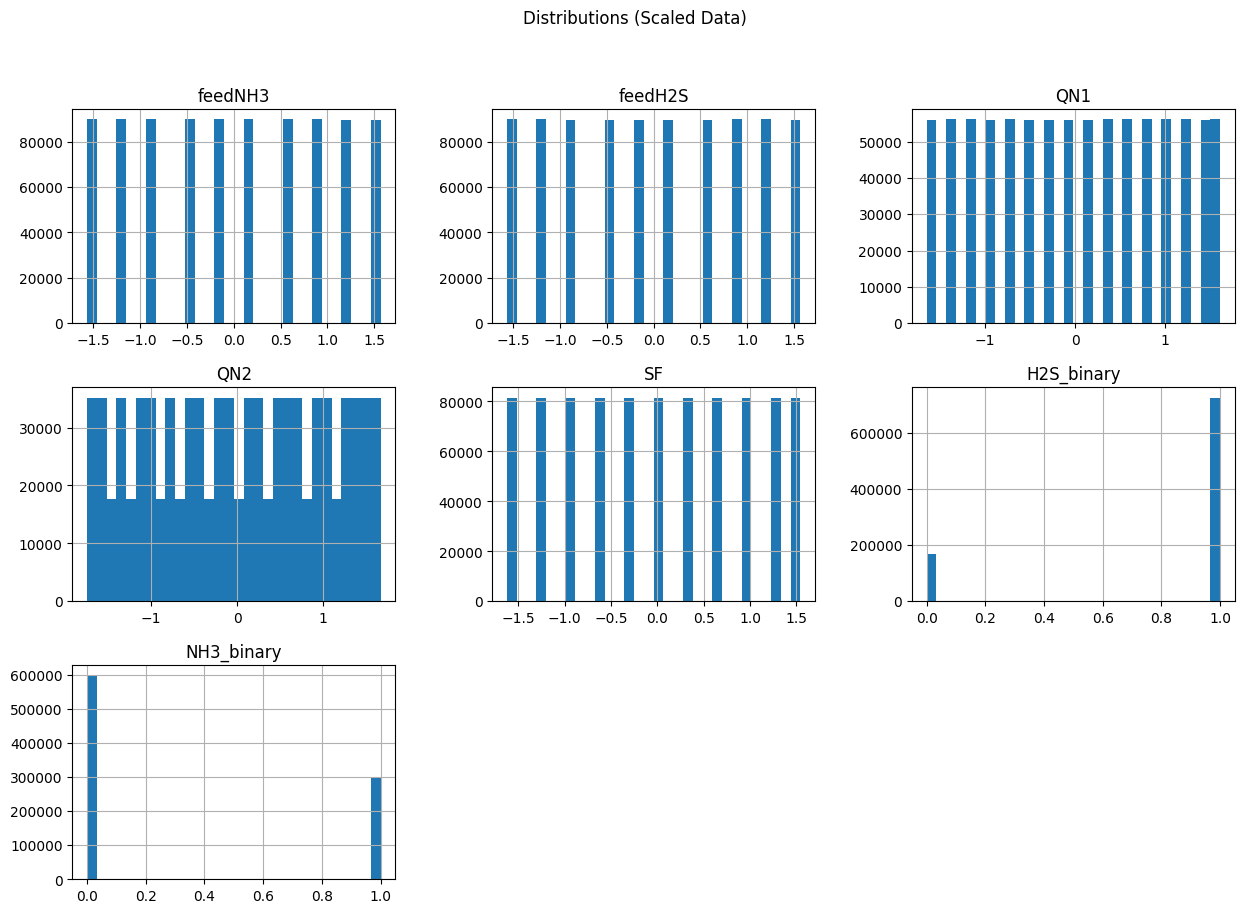

In [44]:
# Data Distribution and Descriptive Statistics
# Histograms for each feature in df_scaled
df2_scaled.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distributions (Scaled Data)")
plt.show()

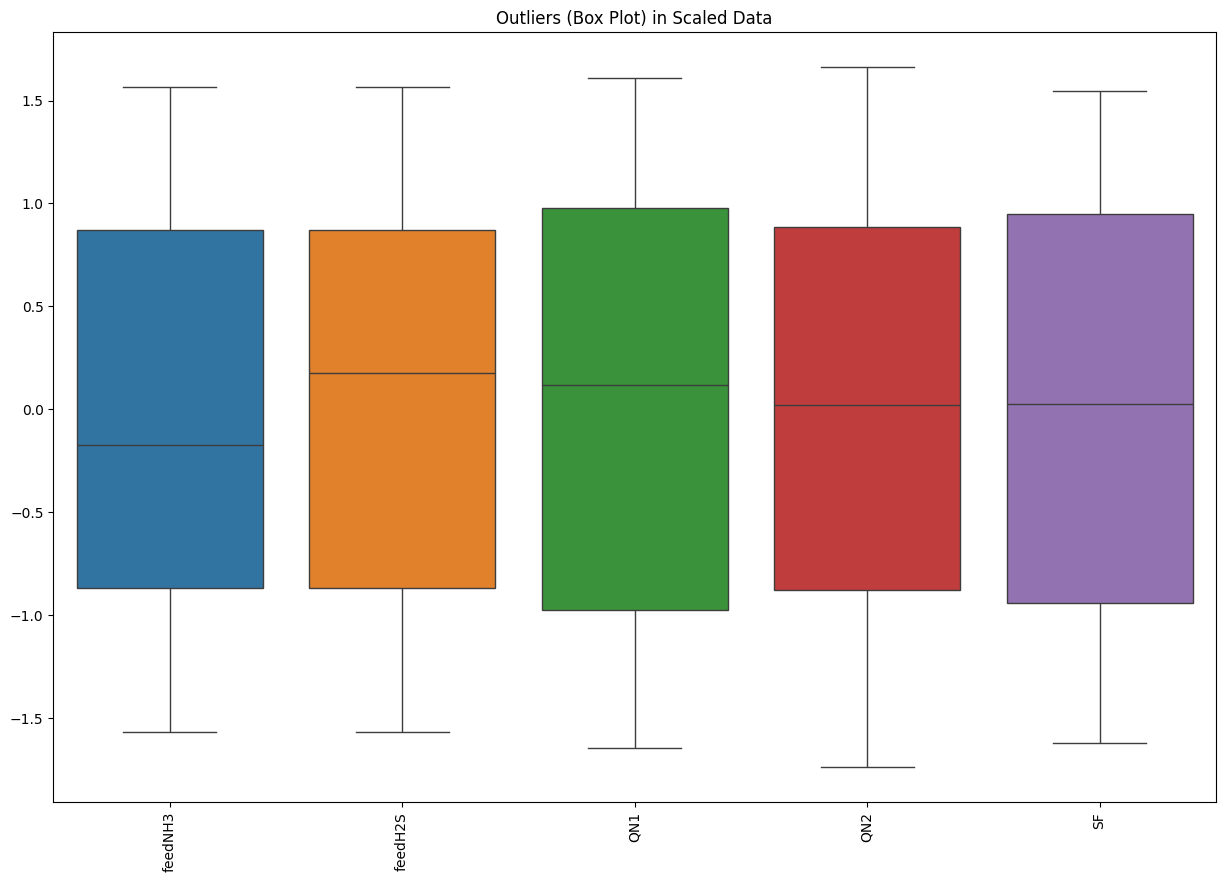

In [45]:
# Box plots to check for outliers in df_scaled
plt.figure(figsize=(15, 10))
sns.boxplot(data=df2_scaled_x)
plt.xticks(rotation=90)
plt.title("Outliers (Box Plot) in Scaled Data")
plt.show()

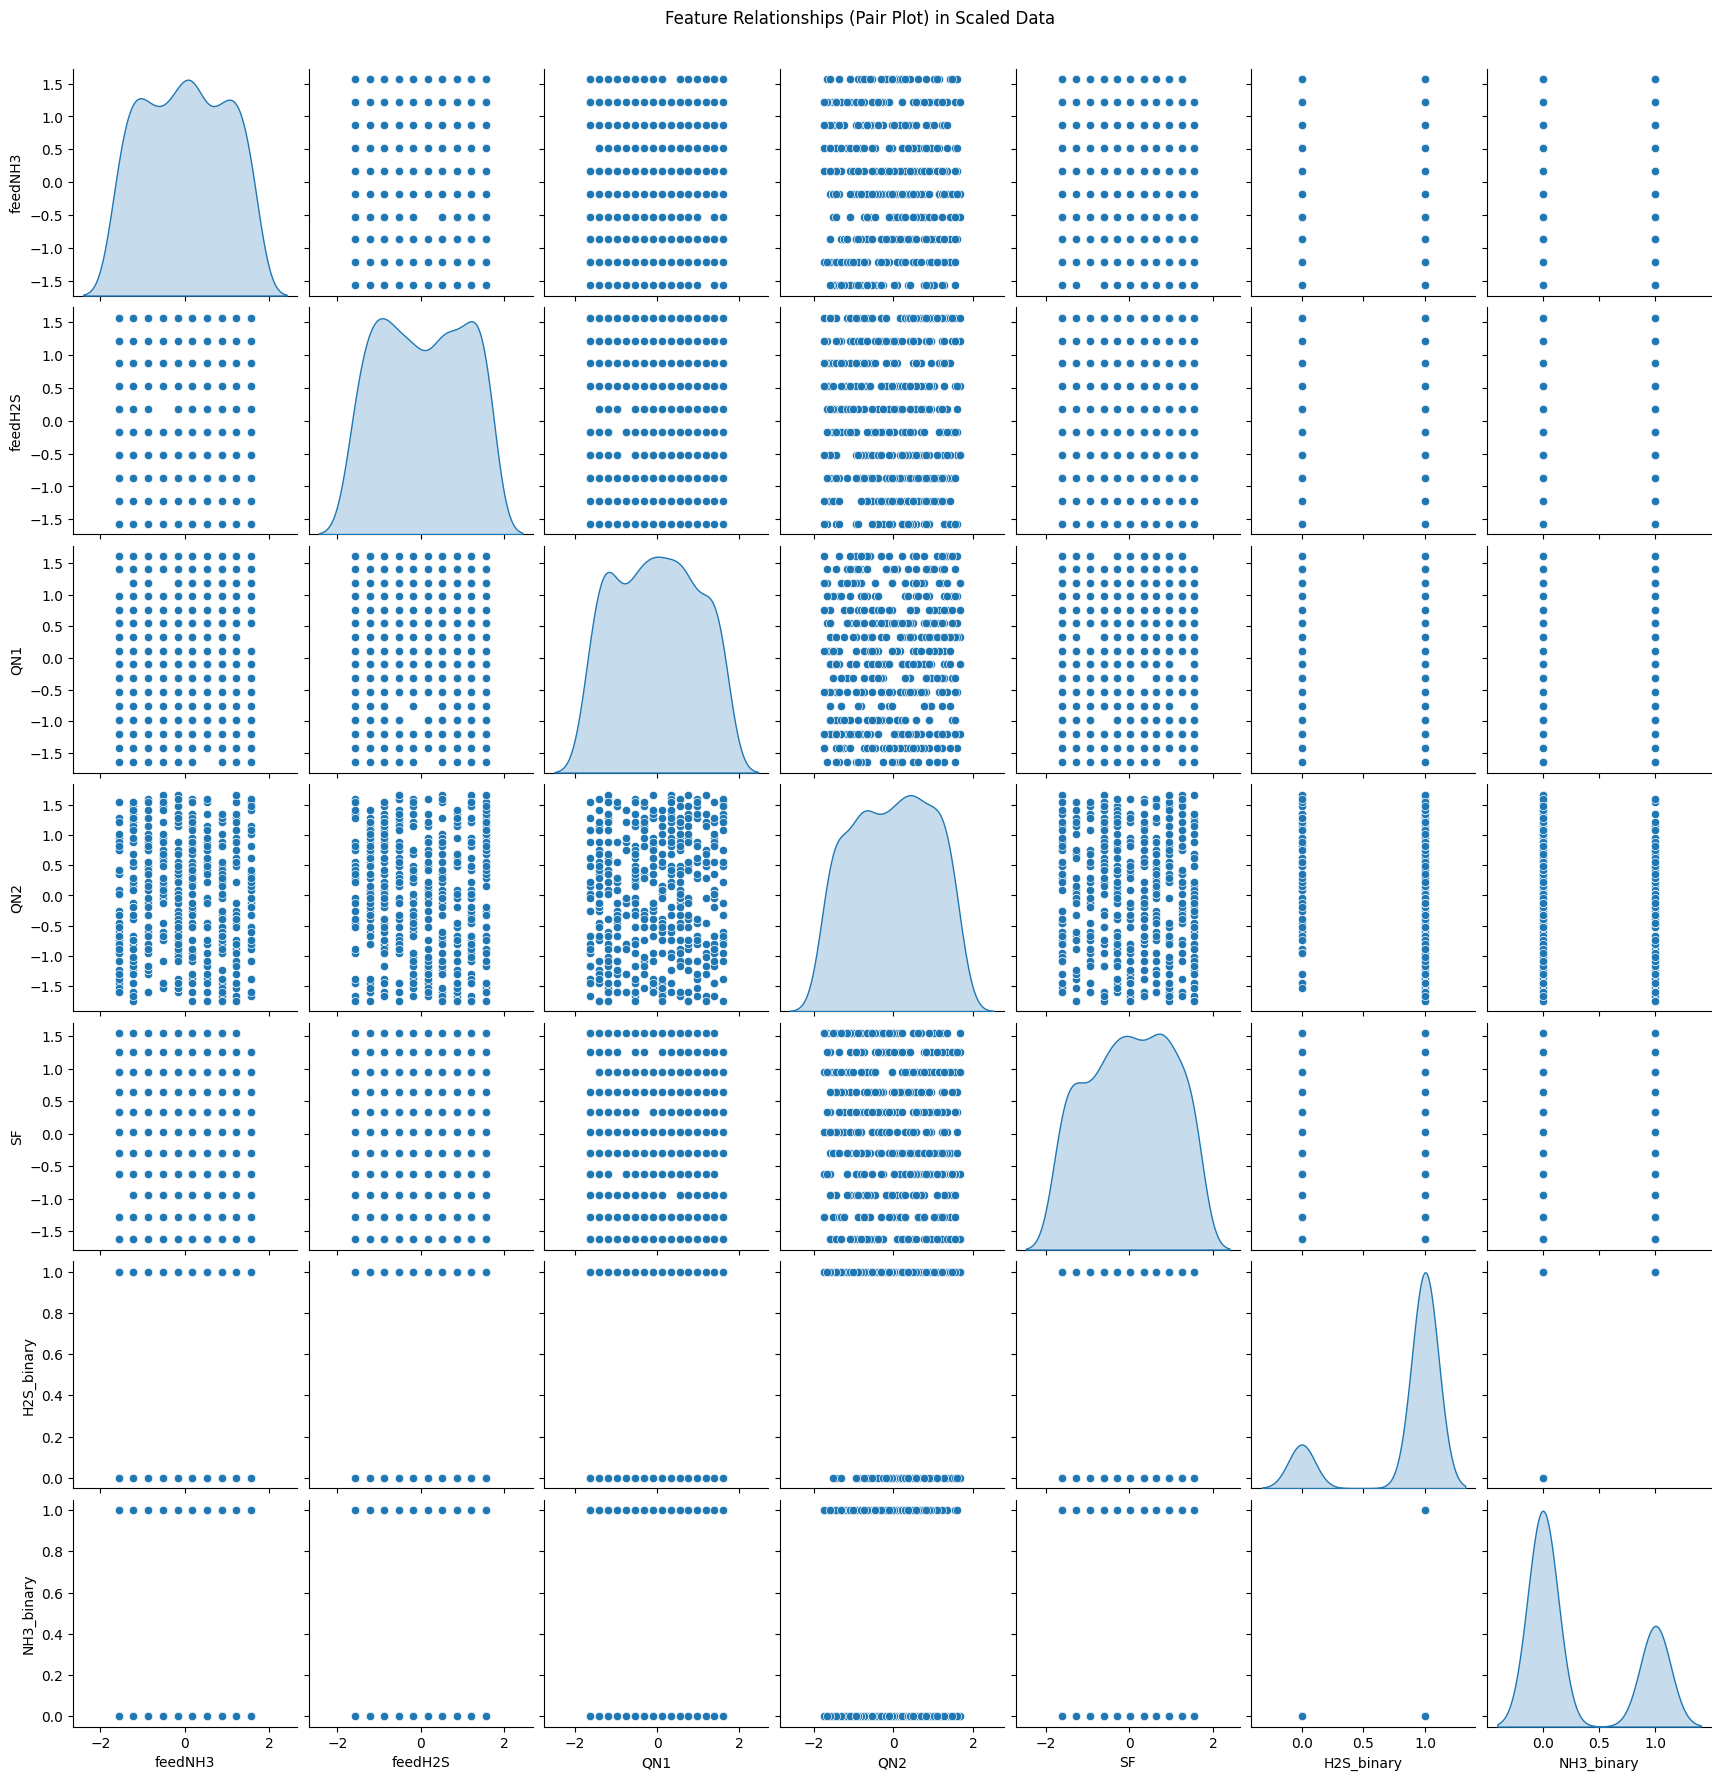

In [46]:
# Pair Plot (if data size is manageable)
sns.pairplot(df2_scaled.sample(n=min(500, len(df2_scaled))), diag_kind='kde')
plt.suptitle("Feature Relationships (Pair Plot) in Scaled Data", y=1.02)
plt.show()

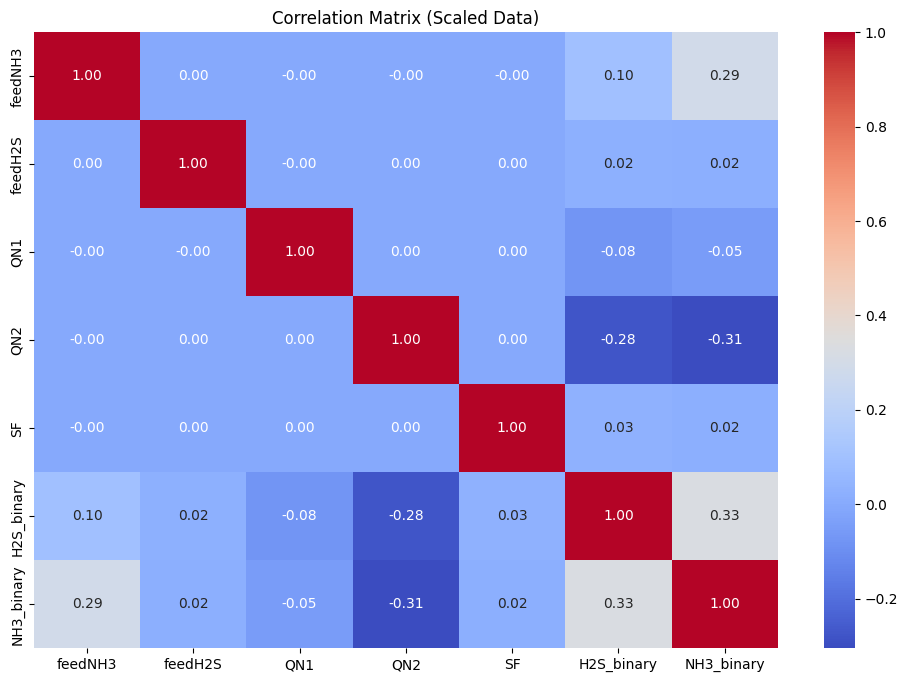

In [47]:
# Correlation Analysis
# Heatmap for Correlation Matrix in df_scaled
plt.figure(figsize=(12, 8))
sns.heatmap(df2_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Scaled Data)")
plt.show()

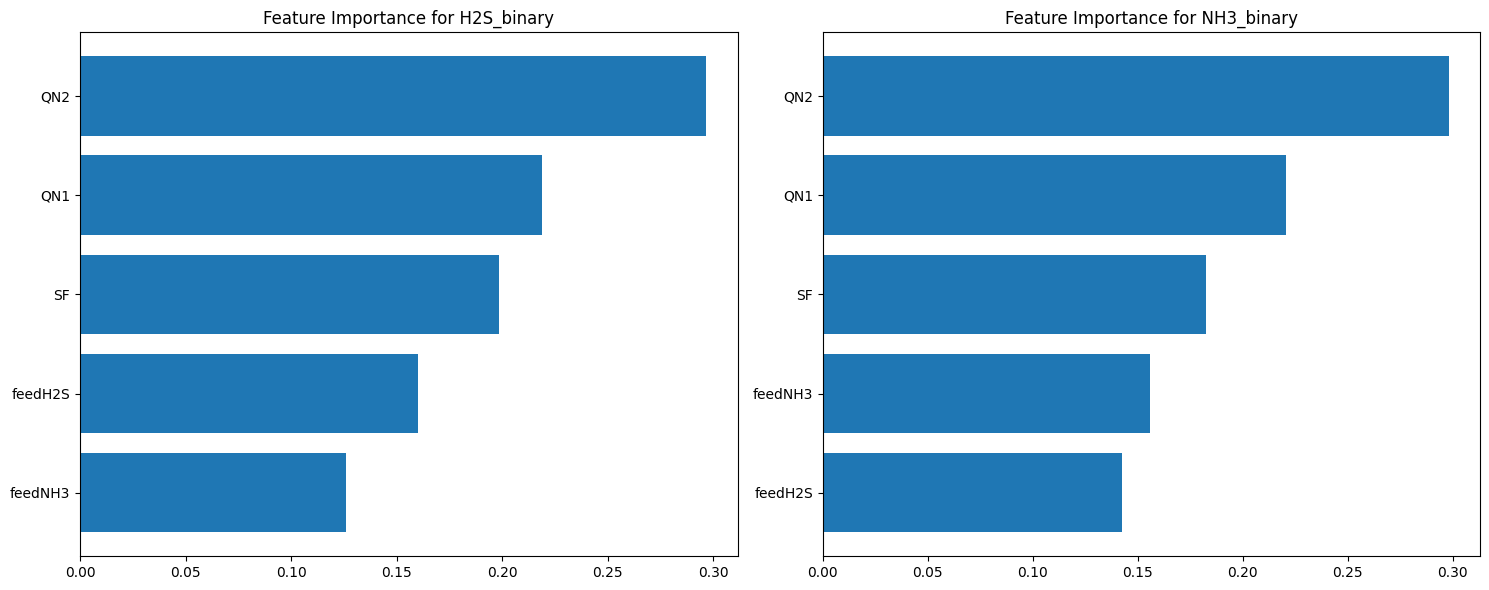


feedNH3:
H2S_binary: 0.1259
NH3_binary: 0.1559

feedH2S:
H2S_binary: 0.1602
NH3_binary: 0.1426

QN1:
H2S_binary: 0.2187
NH3_binary: 0.2208

QN2:
H2S_binary: 0.2966
NH3_binary: 0.2982

SF:
H2S_binary: 0.1986
NH3_binary: 0.1825


In [48]:
# Create and fit model
multi_model = MultiOutputRegressor(RandomForestRegressor(random_state=42, n_jobs=-1))
multi_model.fit(df2_scaled_x, df2_bin_y)

# Create plot
plt.figure(figsize=(15, 6))

# Plot for each target
for i, (estimator, target_name) in enumerate(zip(multi_model.estimators_, df2_bin_y.columns)):
    plt.subplot(1, 2, i+1)
    sorted_idx = np.argsort(estimator.feature_importances_)
    plt.barh(df2_scaled_x.columns[sorted_idx], estimator.feature_importances_[sorted_idx])
    plt.title(f"Feature Importance for {target_name}")

plt.tight_layout()
plt.show()

# Print values if needed
for feature in df2_scaled_x.columns:
    print(f"\n{feature}:")
    for i, target_name in enumerate(df2_bin_y.columns):
        print(f"{target_name}: {multi_model.estimators_[i].feature_importances_[df2_scaled_x.columns.get_loc(feature)]:.4f}")

In [49]:
# # Visualizing High-Dimensional Data with t-SNE
# # Using t-SNE to reduce features to 2 dimensions for visualization
# tsne = TSNE(n_components=2, random_state=42)
# x_tsne = tsne.fit_transform(df2_scaled_x)

# # Plot t-SNE result, coloring points by the mean of the target values in df2_bin_y
# plt.figure(figsize=(10, 8))
# plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=df2_bin_y.mean(axis=1), cmap="viridis", alpha=0.7)
# plt.colorbar(label='Mean Target Value (Scaled Data)')
# plt.title("t-SNE Visualization of Scaled Features (Colored by Mean Target Value)")
# plt.show()

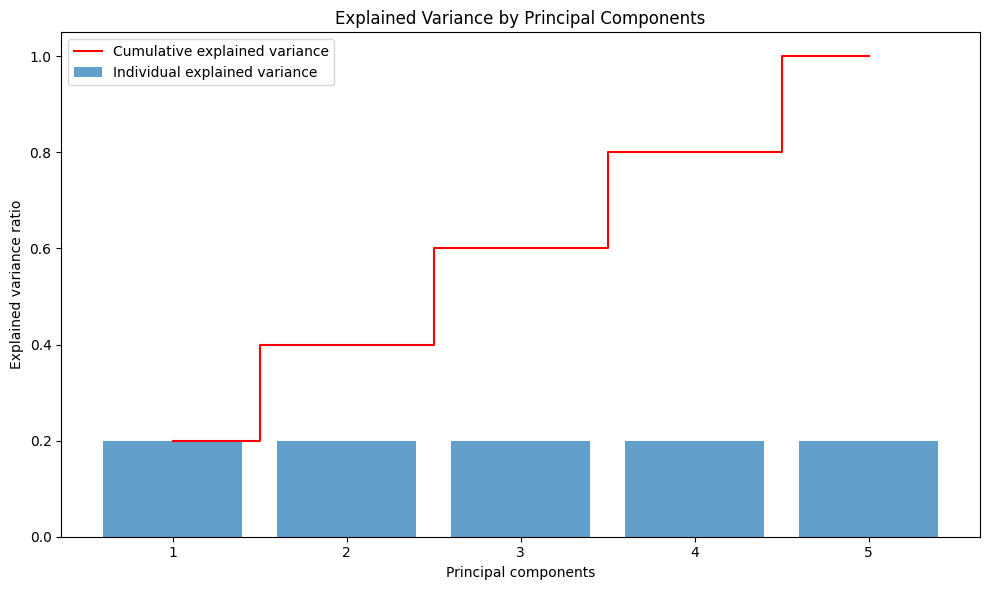

Number of components explaining 95% of variance: 5


In [50]:

# Ensure the data is a NumPy array (if it's not already)
x_data = df2_scaled_x.values
y_data = df2_bin_y['H2S_binary'].values  # Use one binary label, e.g., 'H2S_binary'

# Perform PCA
pca = PCA()
pca_results = pca.fit_transform(x_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Select the top components explaining 95% of variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {num_components}")

# Project data to the selected components
x_pca = pca_results[:, :num_components]

# Convert back to a DataFrame for analysis
columns = [f"PC{i + 1}" for i in range(num_components)]
pca_df = pd.DataFrame(x_pca, columns=columns)
pca_df['binary_label'] = y_data

# # Visualize the first two principal components
# plt.figure(figsize=(10, 6))
# plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['binary_label'], cmap='viridis', edgecolor='k', alpha=0.7)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA: First Two Principal Components')
# plt.colorbar(label='Binary Label')
# plt.tight_layout()
# plt.show()

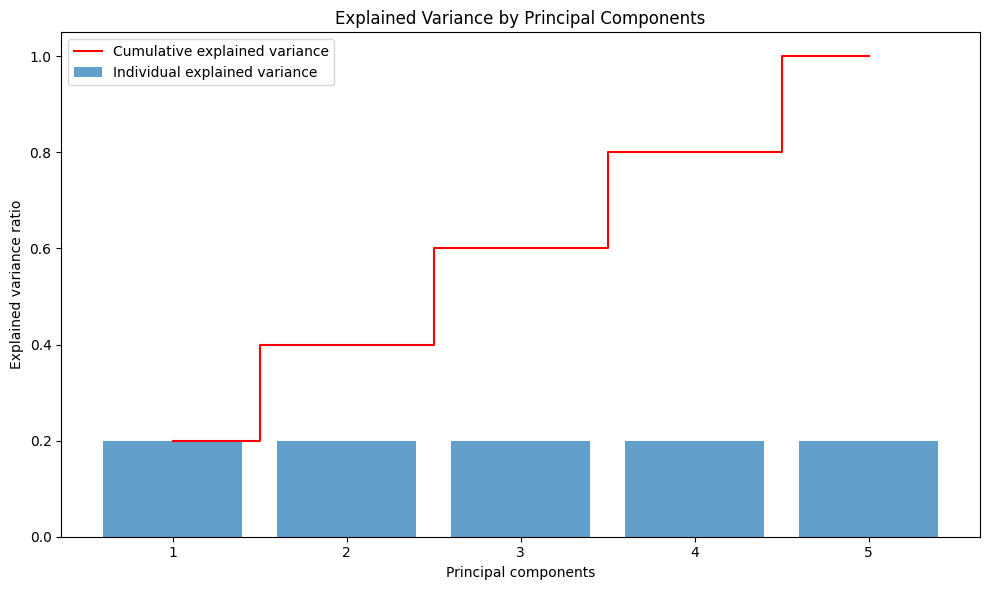

Number of components explaining 95% of variance: 5


In [51]:

# Ensure the data is a NumPy array (if it's not already)
x_data = df2_scaled_x.values
y_data = df2_bin_y['NH3_binary'].values  # Use one binary label, e.g., 'H2S_binary'

# Perform PCA
pca = PCA()
pca_results = pca.fit_transform(x_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Select the top components explaining 95% of variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {num_components}")

# Project data to the selected components
x_pca = pca_results[:, :num_components]

# Convert back to a DataFrame for analysis
columns = [f"PC{i + 1}" for i in range(num_components)]
pca_df = pd.DataFrame(x_pca, columns=columns)
pca_df['binary_label'] = y_data

# # Visualize the first two principal components
# plt.figure(figsize=(10, 6))
# plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['binary_label'], cmap='viridis', edgecolor='k', alpha=0.7)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA: First Two Principal Components')
# plt.colorbar(label='Binary Label')
# plt.tight_layout()
# plt.show()

In [52]:
# # Extract PCA features and labels
# pca_features = pca_df.iloc[:, :-1].values  # All columns except the last one

# # Standardize the PCA features (if not already standardized)
# scaler = StandardScaler()
# pca_features_scaled = scaler.fit_transform(pca_features)

# # Determine the optimal number of clusters using the Elbow Method
# inertia = []
# k_values = range(2, 11)  # Test cluster sizes from 2 to 10

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(pca_features_scaled)
#     inertia.append(kmeans.inertia_)

# # Plot the Elbow Curve
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, inertia, marker='o')
# plt.xticks(k_values)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal K')
# plt.grid()
# plt.show()


Silhouette Score for 2 clusters: 0.15


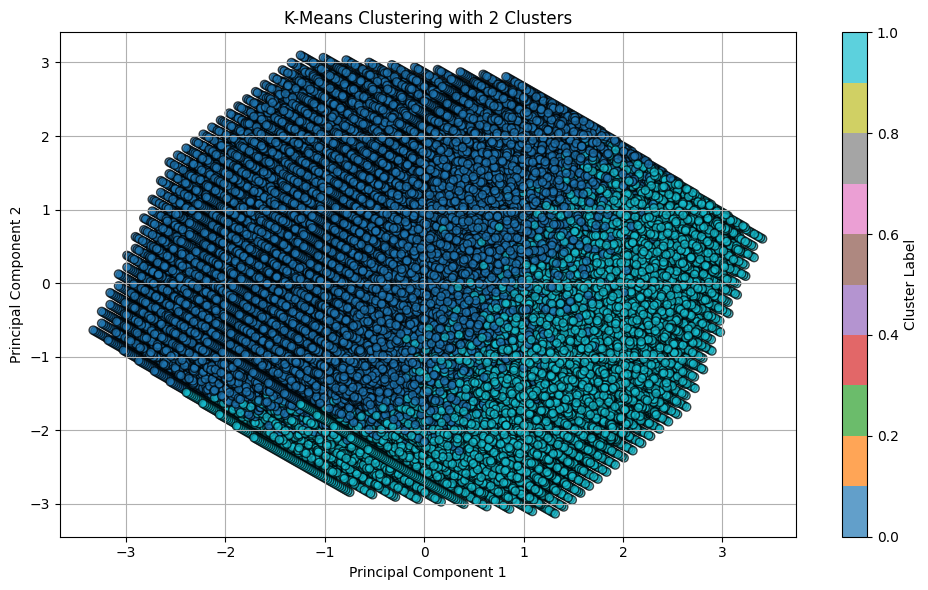

In [53]:

# Choose the optimal number of clusters (based on the Elbow Curve)
optimal_k = 2

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_features_scaled)

# Add cluster labels to the DataFrame
pca_df['cluster'] = kmeans.labels_

# Calculate silhouette score
sil_score = silhouette_score(pca_features_scaled, kmeans.labels_)
print(f"Silhouette Score for {optimal_k} clusters: {sil_score:.2f}")

# Visualize the Clusters (using the first two PCA components)
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='tab10', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.tight_layout()
plt.show()

Explained variance by the 2 components: [0.20001653 0.20000513]


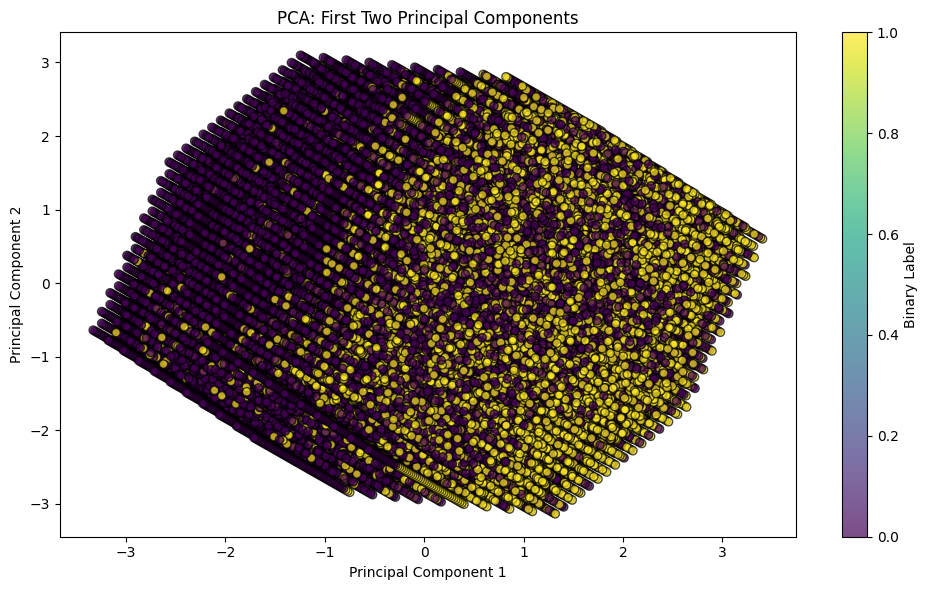

Silhouette Score for 2 clusters: 0.31


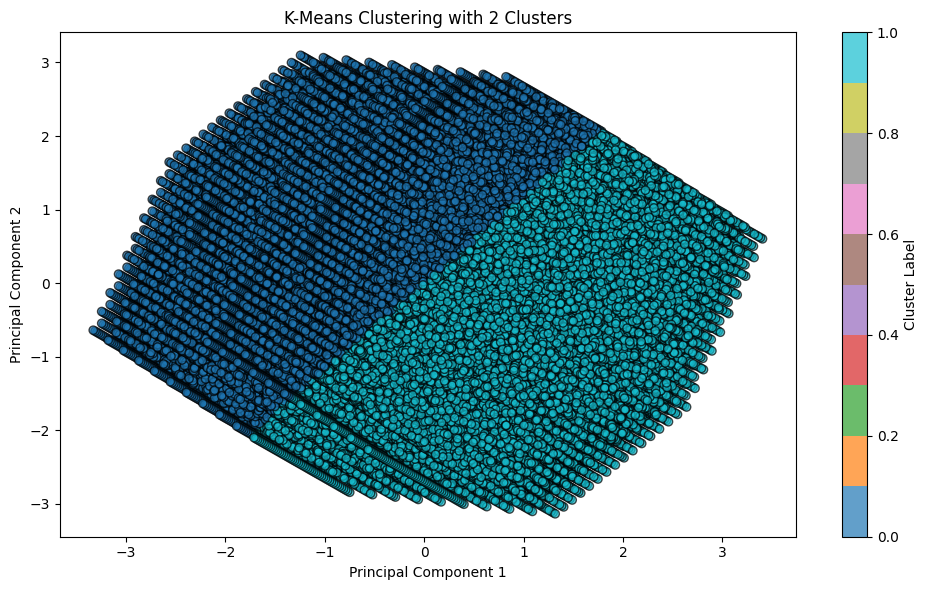

In [54]:
y_data = df2_bin_y['NH3_binary'].values  # Use one binary label, e.g., 'H2S_binary'

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_results = pca.fit_transform(x_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance by the 2 components: {explained_variance_ratio}")

# Create a DataFrame for the 2 principal components
pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'])
pca_df['binary_label'] = y_data

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['binary_label'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Binary Label')
plt.tight_layout()
plt.show()


# Perform K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_results)
pca_df['cluster'] = kmeans.labels_

# Calculate silhouette score
sil_score = silhouette_score(pca_results, kmeans.labels_)
print(f"Silhouette Score for 2 clusters: {sil_score:.2f}")

# Visualize K-Means Clustering
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='tab10', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with 2 Clusters')
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()


Explained variance by the 2 components: [0.20001653 0.20000513]


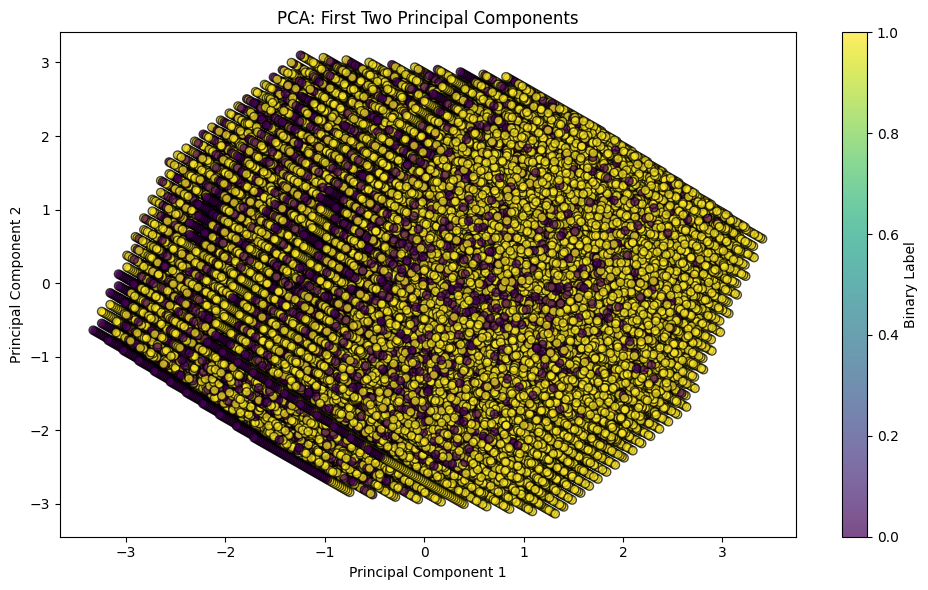

Silhouette Score for 2 clusters: 0.31


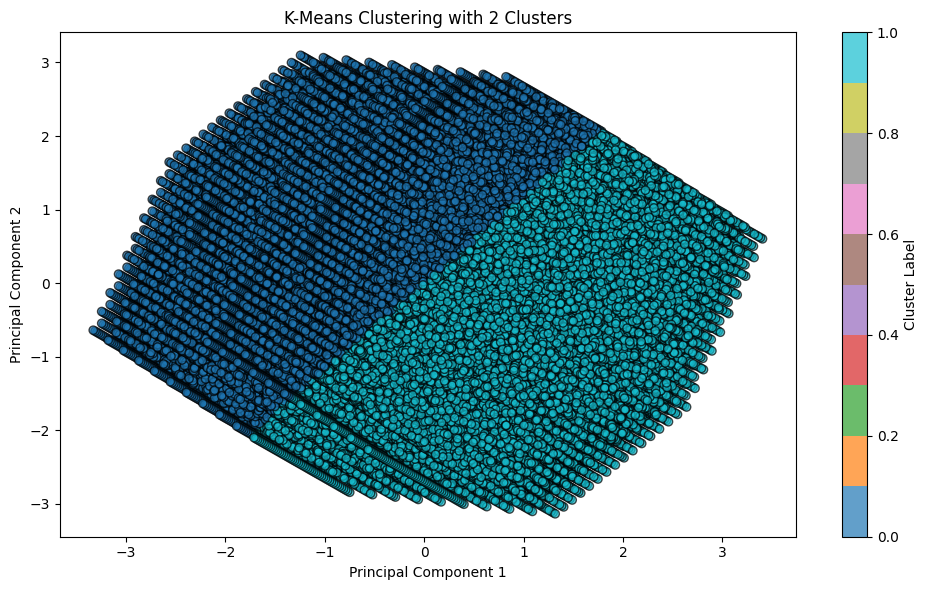

In [55]:
y_data = df2_bin_y['H2S_binary'].values # now, with H2S_binary

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_results = pca.fit_transform(x_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance by the 2 components: {explained_variance_ratio}")

# Create a DataFrame for the 2 principal components
pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'])
pca_df['binary_label'] = y_data

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['binary_label'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Binary Label')
plt.tight_layout()
plt.show()


# Perform K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_results)
pca_df['cluster'] = kmeans.labels_

# Calculate silhouette score
sil_score = silhouette_score(pca_results, kmeans.labels_)
print(f"Silhouette Score for 2 clusters: {sil_score:.2f}")

# Visualize K-Means Clustering
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='tab10', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with 2 Clusters')
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()